In [163]:
import json
import numpy as np
import pandas as pd
import cv2
import os
import scipy.misc
import random

from PIL import Image
from sklearn import preprocessing
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats, integrate, misc
from skimage import io,img_as_float

%matplotlib inline

In [2]:
# GLOBAL CONSTANTS
DATA_FILE = 'leafsnap-dataset-images.csv'
NUM_CLASSES = 185

In [165]:
columns = ['file_id', 'image_pat', 'segmented_path', 'species', 'source']
data = pd.read_csv(DATA_FILE, names=columns, header=1)
display(data.head())

images     = data['image_pat']
images_seg = data['segmented_path']
species    = data['species']

,file_id,image_pat,segmented_path,species,source
0,55498,dataset/images/lab/abies_concolor/ny1157-01-2.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
1,55499,dataset/images/lab/abies_concolor/ny1157-01-3.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
2,55500,dataset/images/lab/abies_concolor/ny1157-01-4.jpg,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor,lab
3,55501,dataset/images/lab/abies_concolor/ny1157-02-1.jpg,dataset/segmented/lab/abies_concolor/ny1157-02...,Abies concolor,lab
4,55502,dataset/images/lab/abies_concolor/ny1157-02-2.jpg,dataset/segmented/lab/abies_concolor/ny1157-02...,Abies concolor,lab


In [227]:
def load_image_and_preprocess(path, segmented_path, flip_left_right=False, flip_up_down=False, rotate_180=False):
    # Open image from disk and flip it if generating data.
    image = misc.imread(path.strip())
    segmented_image = misc.imread(segmented_path.strip())
    
    img = segmented_image
    h, w = img.shape[:2]
    height,width = h,w
    # print('Height: {:3d}, Width: {:4d}\n'.format(height,width))
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #Calculate bounding rectangles for each contour.
    rects = [cv2.boundingRect(cnt) for cnt in contours]

    #Calculate the combined bounding rectangle points.
    top_x = min([x for (x, y, w, h) in rects]) - 40
    bottom_x = max([x+w for (x, y, w, h) in rects]) + 80
    top_y = min([y for (x, y, w, h) in rects]) - 40
    bottom_y = max([y+h for (x, y, w, h) in rects]) + 80

    # print('Top X: {:3d}, Bottom X: {:3d}\nTop Y: {:3d}, Bottom Y: {:3d}'.format(top_x, bottom_x, top_y, bottom_y))

    # Use the rectangle to crop on original image
    img = image[top_y:bottom_y, top_x:bottom_x]
    img = scipy.misc.imresize(img, (264,264))
    return img

(264, 264, 3)


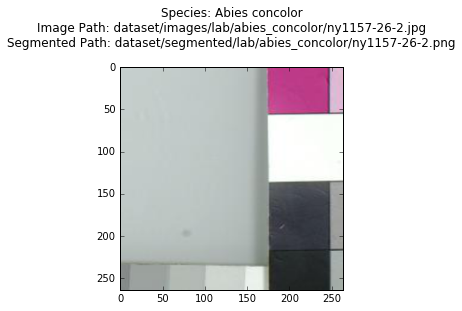

(264, 264, 3)


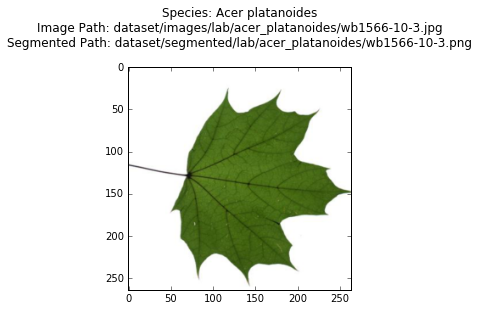

(264, 264, 3)


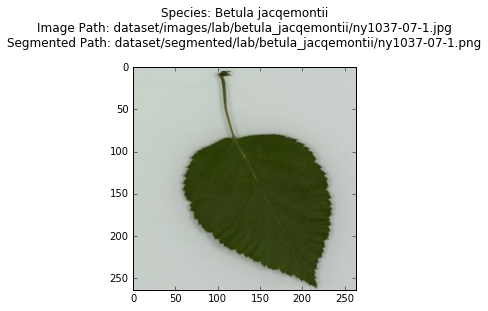

In [228]:
# sample = random.sample(range(0, len(images)), 3)
sample = [100, 1140, 3293]

cropped_images = []
image_species = []
for index in sample:
    image = load_image_and_preprocess(images[index], images_seg[index])
    print(image.shape)
    cropped_images.append(image)
    image_species.append(species[index])
    _ = plt.imshow(image)
    plt.title('Species: {}\nImage Path: {}\nSegmented Path: {}\n'.format(species[index], images[index], images_seg[index]))
    plt.show()